In [1]:
import re
import pandas as pd
import numpy as np
import sys
#from datetime import datetime
import time
from oraDB import oraDB
from sqlalchemy import text
import collections

# Query feature store Dev DB

In [2]:
conn,cur= oraDB.connect()

--- 0.20125961303710938econds ---
Connection successful!


In [3]:
dbEngine = oraDB.create_engine()
sql_statement = """select FTR_NM, max(RPT_DT) as last_rpt_dt from CINS_SMY.CINS_FEATURE_STORE
    group by FTR_NM
    order by FTR_NM"""
with dbEngine.connect() as conn:
    # conn.execute(text(sql_statement))
    cur.execute(sql_statement)

In [4]:
result = list(cur)

In [5]:
fs_dev = pd.DataFrame(result, columns=['FTR_NM', 'RPT_DT'])

In [6]:
fs_dev

,FTR_NM,RPT_DT
0,ADDR_TOWN,2023-07-31
1,AGE,2023-01-16
2,APPLIANCES_CT_TXN_12M,2023-01-16
3,APPLIANCES_CT_TXN_1M,2023-01-16
4,APPLIANCES_SM_AMT_12M,2023-01-16
...,...,...
210,UTILITIES_SM_AMT_1M,2023-01-16
211,VEHICLES_CT_TXN_12M,2023-01-16
212,VEHICLES_CT_TXN_1M,2023-01-16
213,VEHICLES_SM_AMT_12M,2023-01-16


In [33]:
fs_dev.to_csv('FSDB.csv', index=False)

# Check Script Insert Main

In [7]:
# path = '/opt/bitnami/jupyterhub-singleuser/Feature Job/script_insert_main.txt'
path = '/opt/bitnami/jupyterhub-singleuser/Feature Job/final_script_insert_full_21082023.txt'

In [8]:
with open(path, 'r') as f:
    c = f.readlines()
    text = ' '.join(i for i in c)

In [9]:
groups = [i.strip() + ';' for i in text.split(';')]

In [10]:
df = pd.DataFrame(groups, columns=['sql'])

In [11]:
def find_feat(x):
    all_ans = re.findall(r'\'(\w+)\'', x)
    all_ans = [i for i in all_ans if len(i) >2]
    return all_ans

In [12]:
df['feat'] = df['sql'].apply(lambda x: find_feat(x))

In [13]:
tmp = df['feat'].tolist()
tmp = [j for i in tmp for j in i]
tmp = {k: len(k) for k in tmp}
tmp = {k: v for k, v in sorted(tmp.items(), key=lambda item:item[1])}
del tmp['SUC']
# del tmp['AGE']
# del tmp['LOR']
del tmp['704']
del tmp['JCB']
del tmp['1700']
del tmp['1602']
del tmp['6010']
del tmp['6011']
del tmp['6211']
del tmp['6012']
del tmp['6051']
del tmp['yyyy']
del tmp['10__']
# del tmp['AREA']
del tmp['CASH']
del tmp['3024']
del tmp['9413']
del tmp['9415']
del tmp['VISA']
del tmp['7631']
del tmp['5944']
del tmp['PATM']
del tmp['4200']
del tmp['4201']
del tmp['4203']
del tmp['4204']
del tmp['4205']
del tmp['4207']
del tmp['4208']
del tmp['4210']
del tmp['4213']
del tmp['4214']
del tmp['4215']
del tmp['4216']
del tmp['4217']
del tmp['4218']
del tmp['4219']
del tmp['4220']
del tmp['4221']
del tmp['4224']
del tmp['4230']
del tmp['4231']
del tmp['4232']
del tmp['4233']
del tmp['4234']
del tmp['4235']
del tmp['4238']
del tmp['4240']
del tmp['4243']
del tmp['4244']
del tmp['4245']
del tmp['4246']
del tmp['4247']
del tmp['4248']
del tmp['4249']
del tmp['4250']
del tmp['4251']
del tmp['4252']
del tmp['4253']
del tmp['4254']
del tmp['4255']
del tmp['4256']
del tmp['4269']
del tmp['4271']
del tmp['4272']
del tmp['4277']
del tmp['4278']
del tmp['7203']
del tmp['7204']
del tmp['7205']
del tmp['7206']
del tmp['4600']
del tmp['4601']
del tmp['4603']
del tmp['4604']
del tmp['4605']
del tmp['4607']
del tmp['4608']
del tmp['4609']
del tmp['4610']
del tmp['4611']
del tmp['4612']
del tmp['4613']
del tmp['4614']
del tmp['4615']
del tmp['4616']
del tmp['4617']
del tmp['4618']
del tmp['5400']
del tmp['5401']
del tmp['5403']
del tmp['5404']
del tmp['5405']
del tmp['5407']
del tmp['5408']
del tmp['5409']
del tmp['5412']
del tmp['5413']
del tmp['5414']
del tmp['5415']
del tmp['5416']
del tmp['5417']
del tmp['5418']
del tmp['5419']
del tmp['5420']
del tmp['5421']
del tmp['5422']
del tmp['5423']
del tmp['IBMB']
del tmp['CARD']
del tmp['CASA']
del tmp['UNION']
del tmp['NAPAS']
del tmp['OTHER']
del tmp['PAUTO']
del tmp['BRANCH']
del tmp['TRAVEL']
del tmp['BEAUTY']
del tmp['512341']
del tmp['356480']
del tmp['472074']
del tmp['970403']
del tmp['211241']
del tmp['486265']
del tmp['472075']
del tmp['356481']
del tmp['526830']
del tmp['625002']
del tmp['436438']
del tmp['423238']
del tmp['455376']
del tmp['555715']
del tmp['552332']
del tmp['356062']
del tmp['466243']
del tmp['PMTQRV']
del tmp['PMTCUP']
del tmp['PMTIPM']
del tmp['PMTBII']
# del tmp['GEN_GRP']
del tmp['SERVICE']
del tmp['HOBBIES']
del tmp['PBRCHCH']


del tmp['CUSTOMER']
del tmp['INACTIVE']
del tmp['SHOPPING']
del tmp['VEHICLES']
del tmp['SACOMPAY']
del tmp['UTILITIES']
del tmp['CHILD_PET']
del tmp['EDUCATION']
del tmp['INSURANCE']
del tmp['MASTERCARD']
del tmp['LOR_SPLIT']
del tmp['APPLIANCES']

del tmp['AREA_SPLIT']
del tmp['FOOD_GROCERY']

del tmp['HOBBIES_SPORT']
del tmp['PRODUCT_SPLIT']
# for i in list(tmp.keys()):
#     if len(i) <=7:
#         print(f"del tmp['{i}']")

# Check Feature Store Excel file (STB_FIS_FeatureStore_21082023)

In [14]:
sh1 = pd.read_excel('/opt/bitnami/jupyterhub-singleuser/hcl-quanht/examine/STB_FIS_FeatureStore_21082023.xlsx',sheet_name='SELECTED_FEATURE')
sh2 = pd.read_excel('/opt/bitnami/jupyterhub-singleuser/hcl-quanht/examine/STB_FIS_FeatureStore_21082023.xlsx',sheet_name='FEATURE_STORE')

In [15]:
leftovers = list(set(sh2['FEAT_NM']) - set(sh1['FEAT_NM']))
len(leftovers)

271

In [16]:
sh2['FEAT_NM']

0                     REACTIVATED
1                        INACTIVE
2                   CASA_INACTIVE
3            CARD_CREDIT_INACTIVE
4                EB_MBIB_INACTIVE
                  ...            
401    BANCA_DAY_SINCE_LST_ACTIVE
402         BANCA_SUM_RENEWAL_12M
403                 BANCA_SUM_VAL
404                    DEP_SUM_3M
405                 DEP_HOLD_ACCT
Name: FEAT_NM, Length: 406, dtype: object

# Check Overlapped and Unused

In [17]:
in_FS = set(fs_dev['FTR_NM'].tolist())
in_TXT = set(list(tmp.keys()))
in_EXCEL = set(sh2['FEAT_NM'].tolist())

## Check Feature Store DB with Excel 

In [18]:
## in FS and in EXCEL
in_FS & in_EXCEL
## not in FS but in EXCEL
in_EXCEL - in_FS
## in FS but not in EXCEL
in_FS - in_EXCEL;

## Check Script with Excel 

In [19]:
len(in_TXT), len(in_EXCEL), len(in_FS)

(222, 405, 215)

In [20]:
ac = in_TXT
bc = in_EXCEL
## in TXT and in EXCEL
c = ac & bc
# ## not in TXT but in EXCEL
b = bc - ac
# ## in TXT but not in EXCEL
a = ac - bc

In [21]:
len(ac), len(bc)

(222, 405)

In [22]:
len(a), len(b), len(c)

(105, 288, 117)

## Check Script with Feature Store

In [23]:
## in TXT and in FS
in_TXT & in_FS
## not in TXT but in FS
in_FS - in_TXT
## in TXT but not in FS
in_TXT - in_FS

{'CARD_CREDIT_CT_TXN_1M',
 'CARD_CREDIT_CT_TXN_DOM_1M',
 'CARD_CREDIT_CT_TXN_INTER_1M',
 'CARD_CREDIT_CT_TXN_OFFLINE_1M',
 'CARD_CREDIT_CT_TXN_ONLINE_1M',
 'CARD_CREDIT_LIMIT_TXN_M1',
 'CARD_CREDIT_SUM_REV_CASH_1M',
 'CARD_CREDIT_SUM_REV_SALE_1M',
 'CARD_CREDIT_SUM_TXN_DOM_1M',
 'CARD_CREDIT_SUM_TXN_INTER_1M',
 'CARD_CREDIT_SUM_TXN_OFFLINE_1M',
 'CARD_CREDIT_SUM_TXN_ONLINE_1M',
 'HOBBIES_ENTERTAINMENT',
 'INSURANCE_CT_TXN_1M',
 'PUBLIC_SERVICE_HEALTHCARE'}

Conclude:
- There is a lot of mismatched between feature store version (in generating code and in already-in-DB)
- We focus on Excel sheet and Script (I and II)
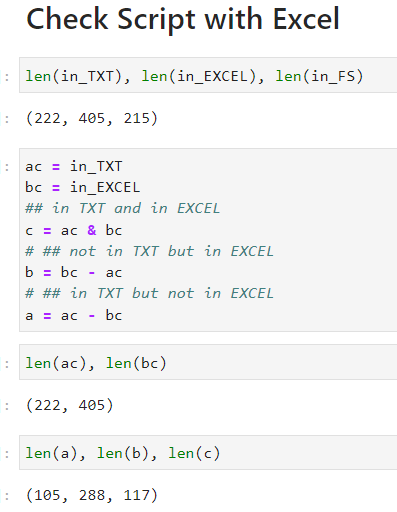

# Focus Excel and Script

In [24]:
ac = in_TXT
bc = in_EXCEL
## in TXT and in EXCEL
c = ac & bc
# ## not in TXT but in EXCEL
b = bc - ac
# ## in TXT but not in EXCEL
a = ac - bc

In [25]:
len(c), c

(117,
 {'AGE',
  'AREA',
  'CARD_AVG_BAL_3M',
  'CARD_AVG_BAL_6M',
  'CARD_BRANCH_LOC_3M',
  'CARD_BRANCH_LOC_6M',
  'CARD_CREDIT_AMOUNT_CASH_LESS_30_6M',
  'CARD_CREDIT_AMOUNT_SALE_MCC_VANG_50_6M',
  'CARD_CREDIT_CASH_RATIO_30_6M',
  'CARD_CREDIT_CT_CARD_ACTIVE',
  'CARD_CREDIT_CT_CONSUMP_LOAN',
  'CARD_CREDIT_CT_INACTIVE_ALL',
  'CARD_CREDIT_CT_TXN_12M',
  'CARD_CREDIT_CT_TXN_1M',
  'CARD_CREDIT_CT_TXN_3M',
  'CARD_CREDIT_CT_TXN_6M',
  'CARD_CREDIT_CT_TXN_DOM_12M',
  'CARD_CREDIT_CT_TXN_DOM_1M',
  'CARD_CREDIT_CT_TXN_DOM_3M',
  'CARD_CREDIT_CT_TXN_DOM_6M',
  'CARD_CREDIT_CT_TXN_INTER_12M',
  'CARD_CREDIT_CT_TXN_INTER_1M',
  'CARD_CREDIT_CT_TXN_INTER_3M',
  'CARD_CREDIT_CT_TXN_INTER_6M',
  'CARD_CREDIT_CT_TXN_OFFLINE_12M',
  'CARD_CREDIT_CT_TXN_OFFLINE_1M',
  'CARD_CREDIT_CT_TXN_OFFLINE_3M',
  'CARD_CREDIT_CT_TXN_OFFLINE_6M',
  'CARD_CREDIT_CT_TXN_ONLINE_12M',
  'CARD_CREDIT_CT_TXN_ONLINE_1M',
  'CARD_CREDIT_DAY_SINCE_LTST_TXN',
  'CARD_CREDIT_DEBT_GRP_6M',
  'CARD_CREDIT_INACTIVE',
 

## Giai quyet phan common truoc (vi no san script va tren file Excel)

In [26]:
# incommon
c_set = c
def binary_in_C_set(x):
    result = False, None
    for i in c_set:
        if i in x:
            result = True, i
            break
    return result

In [27]:
df['in_c_set'] = df['sql'].apply(lambda x:binary_in_C_set(x))

In [28]:
df['c_set_ftr_nm'] = df['in_c_set'].apply(lambda x: x[1])
df['in_c_set'] = df['in_c_set'].apply(lambda x: x[0])

In [29]:
for i,r in df[df['in_c_set']].iterrows():
    print('***   ',r['c_set_ftr_nm'])
    print()
    print(r['sql'])
    print('=========================================')

***    EB_MBIB_DAY_SINCE_LTST_TXN

INSERT INTO {TBL_NM}
 SELECT CUSTOMER_CDE, 
     'EB_MBIB_DAY_SINCE_LTST_TXN' FTR_NM,
     TO_DATE('{RPT_DT}','DD-MM-YY') - NVL(MAX(TXN_DT), ADD_MONTHS(TO_DATE('{RPT_DT}','DD-MM-YY'), -36)) FTR_VAL,
 	TO_CHAR(TO_DATE('{RPT_DT}','DD-MM-YY'), 'DD-MM-YYYY') AS RPT_DT,
     CURRENT_TIMESTAMP ADD_TSTP
 FROM DW_ANALYTICS.DW_EB_TRANSACTION_FCT
 WHERE TXN_DT >= ADD_MONTHS(TO_DATE('{RPT_DT}','DD-MM-YY'), -36)
  AND TXN_DT < TO_DATE('{RPT_DT}','DD-MM-YY')
     AND TXN_STATUS = 'SUC'
     AND CUSTOMER_CDE IN (
         SELECT CUSTOMER_CDE 
         FROM CINS_TMP_CUST_TEST)
 GROUP BY CUSTOMER_CDE;
***    EB_MBIB_SUM_TXN_AMT_1M

INSERT INTO {TBL_NM}
 SELECT CUSTOMER_CDE,
     'EB_MBIB_SUM_TXN_AMT_1M' FTR_NM,
     NVL(SUM(ABS(AMT_ENTRY_LCL)), 0) FTR_VAL,
     TO_CHAR(TO_DATE('{RPT_DT}','DD-MM-YY'), 'DD-MM-YYYY') AS RPT_DT,
     CURRENT_TIMESTAMP ADD_TSTP
 FROM 
     (SELECT DISTINCT TXN_ID, CUSTOMER_CDE, TXN_DT, AMT_ENTRY_LCL 
     FROM DW_ANALYTICS.DW_EB_TRANSACTI

In [30]:
def filter_time_format(x):
    if type(x) == str:
        res = x.split('_')[-1]
        a = re.search(r'\d', res)
        if a:
            return res
    return None

In [31]:
df['timewindow'] = df['c_set_ftr_nm'].apply(lambda x: filter_time_format(x))

In [32]:
df[df['timewindow'].notnull()]

,sql,feat,in_c_set,c_set_ftr_nm,timewindow
1,"INSERT INTO {TBL_NM}\n SELECT CUSTOMER_CDE,\n ...","[EB_MBIB_SUM_TXN_AMT_1M, SUC, EB_MBIB_SUM_TXN_...",True,EB_MBIB_SUM_TXN_AMT_1M,1M
2,"INSERT INTO {TBL_NM}\n SELECT CUSTOMER_CDE,\n ...","[EB_MBIB_CT_TXN_1M, SUC, EB_MBIB_CT_TXN_3M, SU...",True,EB_MBIB_CT_TXN_3M,3M
7,"INSERT INTO {TBL_NM}\n SELECT CUSTOMER_CDE,\n ...","[EB_SACOMPAY_CT_TXN_1M, EB_SACOMPAY_CT_TXN_3M,...",True,EB_SACOMPAY_CT_TXN_1M,1M
12,"INSERT INTO {TBL_NM}\n SELECT CUSTOMER_CDE,\n ...","[CARD_CREDIT_SUM_TXN_AMT_1M, CARD_CREDIT_SUM_T...",True,CARD_CREDIT_SUM_TXN_AMT_12M,12M
13,"INSERT INTO {TBL_NM}\n SELECT CUSTOMER_CDE,\n ...","[CARD_CREDIT_CT_TXN_1M, CARD_CREDIT_CT_TXN_3M,...",True,CARD_CREDIT_CT_TXN_12M,12M
14,"INSERT INTO {TBL_NM}\n SELECT CUSTOMER_CDE,\n ...","[CARD_CREDIT_SUM_REV_CASH_1M, 6010, 6011, 6211...",True,CARD_CREDIT_SUM_REV_CASH_6M,6M
15,"INSERT INTO {TBL_NM}\n SELECT CUSTOMER_CDE,\n ...","[CARD_CREDIT_SUM_REV_SALE_1M, CARD_CREDIT_SUM_...",True,CARD_CREDIT_SUM_REV_SALE_12M,12M
21,INSERT INTO {TBL_NM}\n SELECT CUSTOMER_ID CUST...,"[CASA_CT_TXN_1M, CUSTOMER, 10__, CASA_CT_TXN_3...",True,CASA_CT_TXN_3M,3M
22,INSERT INTO {TBL_NM}\n SELECT CUSTOMER_ID CUST...,"[CASA_SUM_TXN_AMT_1M, CUSTOMER, 10__, CASA_SUM...",True,CASA_SUM_TXN_AMT_3M,3M
105,"INSERT INTO {TBL_NM}\n select customer_cde, 'C...",[CARD_TOP1_MERCHANT_6M],True,CARD_TOP1_MERCHANT_6M,6M
